# Neural Network (Cat Classifier)

In [17]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image
from functions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
train_dataset = h5py.File('training.h5', "r")
train_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_y = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('test.h5', "r")
test_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_y = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_y = train_y.reshape((1, train_y.shape[0]))
test_y = test_y.reshape((1, test_y.shape[0]))

In [19]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

In [20]:
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T / 255.   # The "-1" makes reshape flatten the remaining dimensions
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T / 255.

In [21]:
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

In [24]:
def two_layer_model(X, Y, layers_dims, learning_rate, num_iterations):
    
    grads = {}
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims

    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Gradient Descent
    for i in range(0, num_iterations):

        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')

        # cost = compute_cost (A2, Y)

        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))

        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')

        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2

        parameters = update_parameters(parameters, grads, learning_rate)
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']

    return parameters

In [26]:
parameters = two_layer_model(train_x, train_y, (n_x, n_h, n_y), 0.0075, 2000)       # takes a minute or two
print ('Training ', end='')
pred_train = predict(train_x, train_y, parameters)
print ('Test ', end='')
pred_test = predict(test_x, test_y, parameters)

Training Accuracy: 0.9856459330143539
Test Accuracy: 0.72


In [28]:
def L_layer_model(X, Y, layers_dims, learning_rate, num_iterations):

    parameters = initialize_parameters_deep(layers_dims)
    
    # Gradient Descent
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters)
        grads = L_model_backward(AL, Y, caches)        
        parameters = update_parameters(parameters, grads, learning_rate)
    
    return parameters

In [29]:
parameters = L_layer_model(train_x, train_y, [12288,20,7,5,1], 0.0075, 2000)        # takes a minute or two
print ('Training ', end='')
pred_train = predict(train_x, train_y, parameters)
print ('Test ', end='')
pred_test = predict(test_x, test_y, parameters)

Training Accuracy: 0.9808612440191385
Test Accuracy: 0.8


Accuracy: 1.0


Text(0.5, 1.0, 'cat')

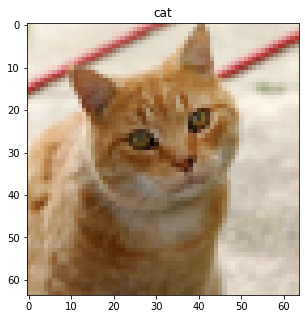

In [30]:
my_image = "test_image.jpg"
my_label_y = [1]            # '1' for cat, '0' otherwise

plt.figure(figsize=(5,5))

image = np.array(Image.open(my_image).resize((num_px, num_px)))
plt.imshow(image, interpolation='nearest')
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_predicted_image = predict(image, my_label_y, parameters)

plt.title(classes[int(np.squeeze(my_predicted_image)),].decode("utf-8"))